Colour ℓ1-TV Denoising
======================

This example demonstrates the use of class [tvl1.TVL1Denoise](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl1.html#sporco.admm.tvl1.TVL1Denoise) for removing salt & pepper noise from a colour image using Total Variation regularization with an ℓ1 data fidelity term (ℓ1-TV denoising).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672])

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = util.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 1.0
opt = tvl1.TVL1Denoise.Options({'Verbose': True, 'MaxMainIter': 100,
                                'RelStopTol': 8e-3, 'gEvalY': False,
                                'rho': 10.0, 'AutoRho': {'Enabled': True,
                                'Period': 5}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl1.TVL1Denoise(imgn, lmbda, opt, caxis=2)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------


   0  1.53e+05  8.07e+04  7.26e+04  2.52e-01  1.26e+00  1.00e+01


   1  1.41e+05  6.49e+04  7.58e+04  1.78e-01  1.12e+00  1.00e+01


   2  1.30e+05  6.36e+04  6.61e+04  1.33e-01  9.43e-01  1.00e+01


   3  1.27e+05  6.64e+04  6.10e+04  1.03e-01  8.99e-01  1.00e+01


   4  1.18e+05  6.54e+04  5.30e+04  7.90e-02  7.96e-01  1.00e+01


   5  1.17e+05  7.53e+04  4.14e+04  8.92e-02  6.49e-01  3.15e+00


   6  1.10e+05  8.16e+04  2.87e+04  7.71e-02  4.99e-01  3.15e+00


   7  1.10e+05  8.51e+04  2.45e+04  6.51e-02  3.55e-01  3.15e+00


   8  1.04e+05  8.39e+04  2.04e+04  4.97e-02  2.52e-01  3.15e+00


   9  1.02e+05  8.34e+04  1.83e+04  3.88e-02  1.83e-01  3.15e+00


  10  1.04e+05  8.40e+04  2.00e+04  5.08e-02  9.11e-02  1.45e+00


  11  1.02e+05  8.37e+04  1.84e+04  4.20e-02  6.79e-02  1.45e+00


  12  9.97e+04  8.31e+04  1.67e+04  3.03e-02  7.06e-02  1.45e+00


  13  9.82e+04  8.21e+04  1.61e+04  2.37e-02  4.99e-02  1.45e+00


  14  9.77e+04  8.19e+04  1.58e+04  2.07e-02  3.38e-02  1.45e+00


  15  9.77e+04  8.19e+04  1.58e+04  1.98e-02  2.65e-02  1.14e+00


  16  9.72e+04  8.15e+04  1.57e+04  1.75e-02  2.13e-02  1.14e+00


  17  9.64e+04  8.08e+04  1.55e+04  1.49e-02  1.78e-02  1.14e+00


  18  9.59e+04  8.05e+04  1.54e+04  1.31e-02  1.54e-02  1.14e+00


  19  9.57e+04  8.04e+04  1.53e+04  1.22e-02  1.30e-02  1.14e+00


  20  9.56e+04  8.04e+04  1.53e+04  1.16e-02  1.06e-02  1.14e+00


  21  9.55e+04  8.03e+04  1.52e+04  1.08e-02  9.12e-03  1.14e+00


  22  9.53e+04  8.02e+04  1.51e+04  1.00e-02  8.28e-03  1.14e+00


  23  9.53e+04  8.01e+04  1.51e+04  9.51e-03  7.27e-03  1.14e+00


  24  9.52e+04  8.01e+04  1.52e+04  9.17e-03  6.20e-03  1.14e+00


  25  9.52e+04  8.00e+04  1.52e+04  8.70e-03  6.18e-03  1.38e+00


  26  9.51e+04  7.99e+04  1.52e+04  8.30e-03  6.10e-03  1.38e+00


  27  9.50e+04  7.98e+04  1.52e+04  8.01e-03  5.42e-03  1.38e+00


  28  9.50e+04  7.98e+04  1.52e+04  7.79e-03  4.66e-03  1.38e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL1Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Denoise solve time:  6.64 s
Noisy image PSNR:    12.02 dB
Denoised image PSNR: 31.86 dB


Display reference, corrupted, and denoised images.

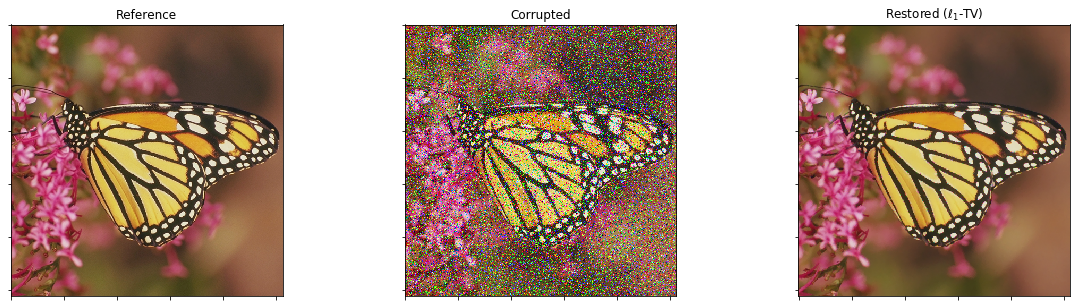

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

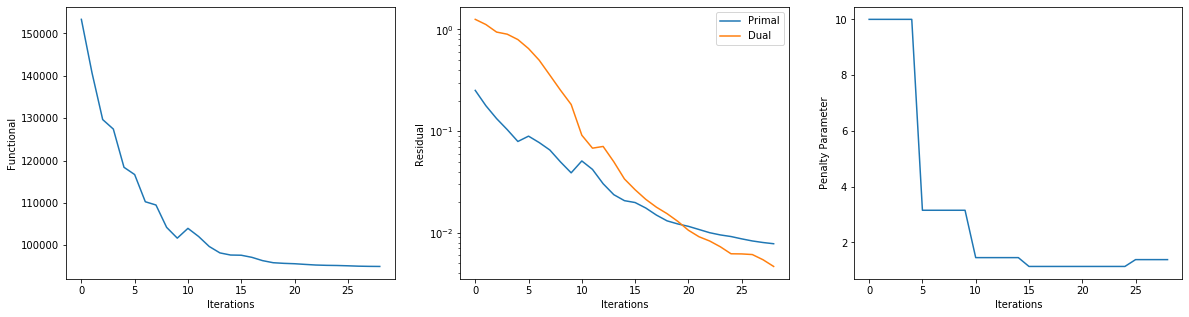

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()